<a href="https://colab.research.google.com/github/OrenBochman/jupyter-adventures/blob/master/Random_Walk_On_A_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#!pip install git+https://github.com/igraph/python-igraph#egg=python-igraph
!pip3 install python-igraph
!pip3 install Faker
!pip3 install cairocffi
!pip3 install networkx
!pip3 install pycairo


     |████████████████████████████████| 204kB 571kB/s 
  Created wheel for pycairo: filename=pycairo-1.19.0-cp37-cp37m-macosx_10_15_x86_64.whl size=89809 sha256=9e5951620de19ee28c8c1fe88cd71e2873c787b9343a13598fbb4547fb4f5b2d
  Stored in directory: /Users/oren/Library/Caches/pip/wheels/0a/62/56/8206c0a38a18504bdd22806a9019caaaeaaf1ce04c0d39e0e2
Successfully built pycairo


## cairo test

In [0]:
import cairo

with cairo.SVGSurface("example.svg", 200, 200) as surface:
    context = cairo.Context(surface)
    x, y, x1, y1 = 0.1, 0.5, 0.4, 0.9
    x2, y2, x3, y3 = 0.6, 0.1, 0.9, 0.5
    context.scale(200, 200)
    context.set_line_width(0.04)
    context.move_to(x, y)
    context.curve_to(x1, y1, x2, y2, x3, y3)
    context.stroke()
    context.set_source_rgba(1, 0.2, 0.2, 0.6)
    context.set_line_width(0.02)
    context.move_to(x, y)
    context.line_to(x1, y1)
    context.move_to(x2, y2)
    context.line_to(x3, y3)
    context.stroke()

In [40]:
import matplotlib.pyplot as plt
import igraph  as ig
from igraph import *
from faker import Faker

fake = Faker()
print(fake.name())

Cheryl Owens


Generate Web Site Graph:

In [41]:
er_graph = ig.Graph.Erdos_Renyi(10, 0.5)
G = Graph(directed=True)
#G.vs['name']= [fake.name() for i in range(100)]
G.add_vertices(22)
G.vs['name']= ['start','exit','lp1','lp2','lp3',
               'home','register_event','investor_relations','contact','about',
               'products','standard','poster','glossy','add_to_cart',
               'checkout','buy',
               'blog', 'post_standard','post_glossy','post_poster','post_standard_2'
               ]
G.vs['color']= ['red','red','green','green','green',
               'green','grey','grey','grey','grey',
               'blue','blue','blue','blue','blue',
               'blue','blue',
               'cyan', 'cyan','cyan','cyan','cyan'
               ]
G.add_edges([
              ('start','home'), ('start','lp1'), ('start','lp2'),('start','lp3'),
              # landing pages
              ('lp1','register_event'),('lp1','exit'),  
              ('lp2','register_event'),('lp2','exit'),
              ('lp3','register_event'),('lp3','exit'),
              ('register_event','exit'),
              # sections
              ('home','contact'), ('home','about'), ('home','products'), ('home','investor_relations'), ('home','blog'),('home','exit'),
              ('about','home'),
              ('contact','home'),
              ('investor_relations','home'),
              ('products','home'),
              # blog
              ('blog','home'), ('blog','post_standard'),('blog','post_glossy'),  ('blog','post_poster'), ('blog','post_standard_2'),
              ('post_standard','blog'), ('post_standard','post_glossy'),
              ('post_glossy','blog'), ('post_glossy','post_poster'),
              ('post_poster','blog'), ('post_poster','post_standard_2'),
              ('post_standard_2','blog'), ('post_standard_2','post_standard'),
              # shop
              ('products','poster'),    ('products','standard'),   ('products','glossy'),
              ('standard','products'),  ('standard','add_to_cart'), ('standard','home'),
              ('poster','products'),    ('poster','add_to_cart'),   ('poster','home'),         
              ('glossy','products'),    ('glossy','add_to_cart'),   ('glossy','home'),
              ('add_to_cart','products'), ('add_to_cart','checkout'),('add_to_cart','exit'),
              ('checkout','buy'),
              ('buy','home'), ('buy','exit'),
             ])

#G.es.get_edge(('start','home')).set_attr("weight", value = 0.25)
G.es['weight']= [ 1 for (idx, e) in enumerate(G.es)]

print(G)


IGRAPH DNW- 22 52 --
+ attr: color (v), name (v), weight (e)
+ edges (vertex names):
start->home, start->lp1, start->lp2, start->lp3, lp1->register_event,
lp1->exit, lp2->register_event, lp2->exit, lp3->register_event, lp3->exit,
register_event->exit, home->contact, home->about, home->products,
home->investor_relations, home->blog, home->exit, about->home, contact->home,
investor_relations->home, products->home, blog->home, blog->post_standard,
blog->post_glossy, blog->post_poster, blog->post_standard_2,
post_standard->blog, post_standard->post_glossy, post_glossy->blog,
post_glossy->post_poster, post_poster->blog, post_poster->post_standard_2,
post_standard_2->blog, post_standard_2->post_standard, products->poster,
products->standard, products->glossy, standard->products,
standard->add_to_cart, standard->home, poster->products, poster->add_to_cart,
poster->home, glossy->products, glossy->add_to_cart, glossy->home,
add_to_cart->products, add_to_cart->checkout, add_to_cart->exit,
checko

# Plotting the web pages graph

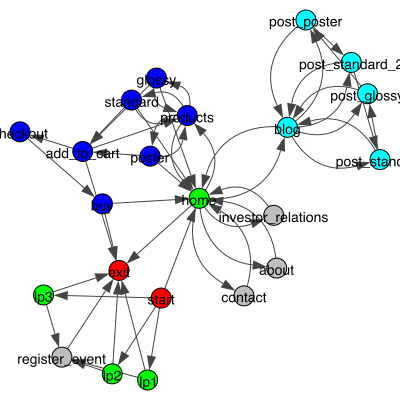

In [48]:
G.vs["label"] = G.vs["name"]
layout = G.layout_kamada_kawai()
#plot(G, layout = layout)
plot(G, layout = layout, bbox = (400, 400), margin = 20)

In [42]:
Ads = Graph(directed=True)
Ads.add_vertices(22)
Ads.vs['name']= ['start','exit','adwords-search','lp1','lp2','lp3','adwords-retargeting', 'adwords',
                 'facebook-search','facebook-retargeting',
                 'adwords-phone', 'adwords-phone',  'adwords-banner', 'youtube-bump','youtube-interstatial']
Ads.add_edges([
              ('start','adwords-search'),
              ('adwords-search','lp1'),('adwords-search','lp2'),('adwords-search','lp3'),('adwords-search','adwords-retargeting'),                           
              ('start','adwords-phone'),
              ('start','adwords-banner'),('adwords-search','lp1'),('adwords-search','lp2'),('adwords-search','lp3'),  
              ('start','adwords'),
              ('start','facebook-search'),
              ('facebook-search','facebook-retargeting'),
              ('start','youtube-bump'),
              ('start','youtube-interstatial'),
              ('lp1','exit'),
              ('lp2','exit'),
              ('lp3','exit')
            ])
#G.es.get_edge(('start','home')).set_attr("weight", value = 0.25)
Ads.es['weight']= [ 1 for (idx, e) in enumerate(Ads.es)]

print(Ads)


IGRAPH DNW- 22 18 --
+ attr: name (v), weight (e)
+ edges (vertex names):
start->adwords-search, adwords-search->lp1, adwords-search->lp2,
adwords-search->lp3, adwords-search->adwords-retargeting,
start->adwords-phone, start->adwords-banner, adwords-search->lp1,
adwords-search->lp2, adwords-search->lp3, start->adwords,
start->facebook-search, facebook-search->facebook-retargeting,
start->youtube-bump, start->youtube-interstatial, lp1->exit, lp2->exit,
lp3->exit


# Plotting the ads pages graph

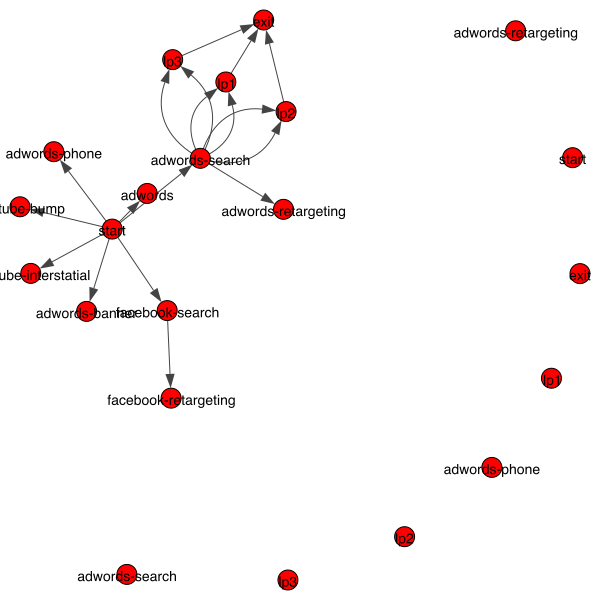

In [45]:
Ads.vs["label"] = Ads.vs["name"]
layout1 = Ads.layout_kamada_kawai()
plot(Ads, layout = layout1)

In [18]:
from termcolor import colored
# print(colored('hello', 'red'), colored('world', 'green'))
# print(colored("hello red world", 'red'))

#print vertex weights
for idx, e in enumerate(G.es):
  #print("{}->{}: [{}]".format(G.vs[e.source]['name'], G.vs[e.target]['name'], e['weight']))
  print(colored("{}".format(G.vs[e.source]['name']),G.vs[e.source]['color']), end = '')
  print("--", end = '')
  print("[{}]".format(e['weight']), end = '')
  print("->", end = '')
  print(colored("{}".format(G.vs[e.target]['name']),G.vs[e.target]['color']))


#print(G.ecount)

#G.get_edgelist()[0:]
# for e in G.get_edgelist():
#     print("{}\t{}\t{}".format(e, e['weight']))


start--[1]->home
start--[1]->lp1
start--[1]->lp2
start--[1]->lp3
lp1--[1]->register_event
lp1--[1]->exit
lp2--[1]->register_event
lp2--[1]->exit
lp3--[1]->register_event
lp3--[1]->exit
register_event--[1]->exit
home--[1]->contact
home--[1]->about
home--[1]->products
home--[1]->investor_relations
home--[1]->blog
home--[1]->exit
about--[1]->home
contact--[1]->home
investor_relations--[1]->home
products--[1]->home
blog--[1]->home
blog--[1]->post_standard
blog--[1]->post_glossy
blog--[1]->post_poster
blog--[1]->post_standard_2
post_standard--[1]->blog
post_standard--[1]->post_glossy
post_glossy--[1]->blog
post_glossy--[1]->post_poster
post_poster--[1]->blog
post_poster--[1]->post_standard_2
post_standard_2--[1]->blog
post_standard_2--[1]->post_standard
products--[1]->poster
products--[1]->standard
products--[1]->glossy
standard--[1]->products
standard--[1]->add_to_cart
standard--[1]->home
poster--[1]->products
poster--[1]->add_to_cart
poster--[1]->home
glossy--[1]->products
glossy--[1]->ad

In [19]:
from random import randint, choice, random
 
def random_walk_iter(g, start=None): 
  current = randint(0, g.vcount()-1) if start is None else start 
  while True: 
    yield current
    if(g.outdegree(current)>0):
      current = choice(g.successors(current))
    else:
      break;

##random_walk(G,0, 3, mode="out", stuck="return")

def gen_session(g):
  session = []
  walker = random_walk_iter(g,start=0)
  for node in walker:
      session.append(g.vs(node)['name'])
      #if random() < 0.01 or g.vs(node)['name']=='exit':
      if g.vs(node)['name']=='exit':
          walker.close()

  return session

session = gen_session(G)
print(session)



[['start'], ['lp2'], ['register_event'], ['exit']]


In [20]:
sessions = [gen_session(G) for i in range(500)]
bounce = 0
lead = 0
conversion = 0
# for s in sessions:
#   if len(s) == 3:
#     bounce += 1
#   for n in s:
#     if n[0] == 'buy':
#       conversion += 1
#       print(s)
#     elif n[0] == 'register_event':
#       lead += 1
# print('{} bounced, {} leads, {} sales'.format(lead,conversion,bounce))

for s in sessions:
  if len(s) == 3:
    print(s)

[['start'], ['lp1'], ['exit']]
[['start'], ['lp1'], ['exit']]
[['start'], ['lp2'], ['exit']]
[['start'], ['lp1'], ['exit']]
[['start'], ['lp1'], ['exit']]
[['start'], ['lp1'], ['exit']]
[['start'], ['lp3'], ['exit']]
[['start'], ['lp3'], ['exit']]
[['start'], ['home'], ['exit']]
[['start'], ['lp3'], ['exit']]
[['start'], ['lp3'], ['exit']]
[['start'], ['lp2'], ['exit']]
[['start'], ['lp3'], ['exit']]
[['start'], ['home'], ['exit']]
[['start'], ['lp1'], ['exit']]
[['start'], ['lp1'], ['exit']]
[['start'], ['lp3'], ['exit']]
[['start'], ['lp3'], ['exit']]
[['start'], ['lp3'], ['exit']]
[['start'], ['lp3'], ['exit']]
[['start'], ['home'], ['exit']]
[['start'], ['lp3'], ['exit']]
[['start'], ['lp2'], ['exit']]
[['start'], ['lp3'], ['exit']]
[['start'], ['lp1'], ['exit']]
[['start'], ['lp3'], ['exit']]
[['start'], ['lp2'], ['exit']]
[['start'], ['lp1'], ['exit']]
[['start'], ['lp1'], ['exit']]
[['start'], ['lp1'], ['exit']]
[['start'], ['lp2'], ['exit']]
[['start'], ['lp1'], ['exit']]
[['st

In [21]:
sessions[1:10]

[[['start'],
  ['home'],
  ['products'],
  ['home'],
  ['about'],
  ['home'],
  ['investor_relations'],
  ['home'],
  ['blog'],
  ['home'],
  ['contact'],
  ['home'],
  ['products'],
  ['standard'],
  ['add_to_cart'],
  ['checkout'],
  ['buy'],
  ['home'],
  ['exit']],
 [['start'], ['lp1'], ['register_event'], ['exit']],
 [['start'], ['lp3'], ['register_event'], ['exit']],
 [['start'], ['lp1'], ['exit']],
 [['start'], ['lp3'], ['register_event'], ['exit']],
 [['start'], ['lp2'], ['register_event'], ['exit']],
 [['start'],
  ['home'],
  ['contact'],
  ['home'],
  ['contact'],
  ['home'],
  ['investor_relations'],
  ['home'],
  ['about'],
  ['home'],
  ['exit']],
 [['start'], ['lp1'], ['exit']],
 [['start'],
  ['home'],
  ['blog'],
  ['post_standard_2'],
  ['blog'],
  ['post_standard_2'],
  ['blog'],
  ['post_standard'],
  ['post_glossy'],
  ['post_poster'],
  ['post_standard_2'],
  ['post_standard'],
  ['blog'],
  ['post_standard'],
  ['blog'],
  ['post_standard'],
  ['post_glossy'],
  

In [0]:
layout = G.layout_kamada_kawai()
plot(G, layout = layout)

In [23]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# I build a data set: 10 individuals and 5 variables for each
ind1=[5,10,3,4,8,10,12,1,9,4]
ind5=[1,1,13,4,18,5,2,11,3,8]
df = pd.DataFrame({ 'A':ind1, 'B':ind1 + np.random.randint(10, size=(10)) , 'C':ind1 + np.random.randint(10, size=(10)) , 'D':ind1 + np.random.randint(5, size=(10)) , 'E':ind1 + np.random.randint(5, size=(10)), 'F':ind5, 'G':ind5 + np.random.randint(5, size=(10)) , 'H':ind5 + np.random.randint(5, size=(10)), 'I':ind5 + np.random.randint(5, size=(10)), 'J':ind5 + np.random.randint(5, size=(10))})
df


,A,B,C,D,E,F,G,H,I,J
0,5,11,6,8,5,1,1,1,3,1
1,10,10,18,11,14,1,5,1,1,2
2,3,5,5,5,5,13,16,17,15,17
3,4,13,10,5,4,4,7,4,4,6
4,8,16,11,9,8,18,18,18,20,22
5,10,13,12,13,10,5,9,5,5,9
6,12,19,13,16,16,2,2,5,3,4
7,1,8,3,1,1,11,15,14,12,15
8,9,14,13,13,11,3,6,6,4,5
9,4,7,13,6,5,8,11,11,9,8


In [24]:
# Calculate the correlation between individuals. We have to transpose first, because the corr function calculate the pairwise correlations between columns.
corr = df.corr()
corr

,A,B,C,D,E,F,G,H,I,J
A,1.000000,0.742055,0.769114,0.970335,0.958828,-0.409401,-0.474676,-0.446672,-0.417947,-0.356547
B,0.742055,1.000000,0.405484,0.722918,0.624400,-0.228455,-0.388557,-0.296123,-0.228141,-0.177678
C,0.769114,0.405484,1.000000,0.690067,0.784032,-0.415221,-0.383557,-0.456195,-0.455288,-0.433927
D,0.970335,0.722918,0.690067,1.000000,0.930780,-0.475287,-0.554326,-0.474477,-0.467062,-0.426326
E,0.958828,0.624400,0.784032,0.930780,1.000000,-0.450521,-0.498336,-0.436447,-0.454369,-0.406611
F,-0.409401,-0.228455,-0.415221,-0.475287,-0.450521,1.000000,0.956987,0.964432,0.993697,0.983828
G,-0.474676,-0.388557,-0.383557,-0.554326,-0.498336,0.956987,1.000000,0.934842,0.928122,0.957793
H,-0.446672,-0.296123,-0.456195,-0.474477,-0.436447,0.964432,0.934842,1.000000,0.965801,0.948320
I,-0.417947,-0.228141,-0.455288,-0.467062,-0.454369,0.993697,0.928122,0.965801,1.000000,0.969722
J,-0.356547,-0.177678,-0.433927,-0.426326,-0.406611,0.983828,0.957793,0.948320,0.969722,1.000000


In [25]:
# Transform it in a links data frame (3 columns only):
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links

,var1,var2,value
0,A,A,1.000000
1,A,B,0.742055
2,A,C,0.769114
3,A,D,0.970335
4,A,E,0.958828
...,...,...,...
95,J,F,0.983828
96,J,G,0.957793
97,J,H,0.948320
98,J,I,0.969722


In [26]:

# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] > 0.8) & (links['var1'] != links['var2']) ]
links_filtered

,var1,var2,value
3,A,D,0.970335
4,A,E,0.958828
30,D,A,0.970335
34,D,E,0.930780
40,E,A,0.958828
43,E,D,0.930780
56,F,G,0.956987
57,F,H,0.964432
58,F,I,0.993697
59,F,J,0.983828


In [0]:
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')

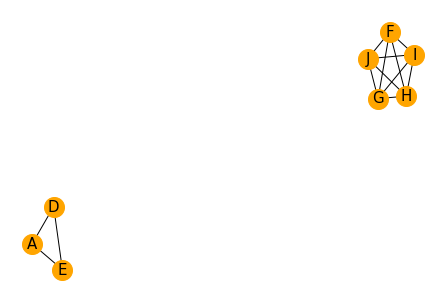

In [28]:
# Plot the network:
nx.draw(G, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)